In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import statsmodels.api as sm

import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.stattools import omni_normtest

from scipy.stats import shapiro

import warnings
warnings.filterwarnings('ignore')

In [3]:
home_price_index = pd.read_csv('CSUSHPISA.csv', parse_dates=['DATE'], index_col='DATE')
personal_income = pd.read_csv('PI.csv', parse_dates=['DATE'], index_col='DATE')
savings_rate = pd.read_csv('PSAVERT.csv', parse_dates=['DATE'], index_col='DATE')
consumer_sentiment = pd.read_csv('UMCSENT.csv', parse_dates=['DATE'], index_col='DATE')
gdp = pd.read_csv('GDPC1_process.csv', parse_dates=['DATE'], index_col='DATE')
new_home_sales = pd.read_csv('HSN1F.csv', parse_dates=['DATE'], index_col='DATE')
building_permits = pd.read_csv('PERMIT.csv', parse_dates=['DATE'], index_col='DATE')
population = pd.read_csv('POPTHM.csv', parse_dates=['DATE'], index_col='DATE')
housing_starts = pd.read_csv('HOUST.csv', parse_dates=['DATE'], index_col='DATE')
unemployment_rate = pd.read_csv('UNRATE.csv', parse_dates=['DATE'], index_col='DATE')
employment_level = pd.read_csv('CE16OV.csv', parse_dates=['DATE'], index_col='DATE')
cpi = pd.read_csv('CPIAUCSL.csv', parse_dates=['DATE'], index_col='DATE')
mortgage_rate = pd.read_csv('MORTGAGE30US_process.csv', parse_dates=['DATE'], index_col='DATE')
leading_indicators = pd.read_csv('USALORSGPNOSTSAM.csv', parse_dates=['DATE'], index_col='DATE')
federal_funds_rate = pd.read_csv('FEDFUNDS.csv', parse_dates=['DATE'], index_col='DATE')
personal_consumption_expenditures = pd.read_csv('PCE.csv', parse_dates=['DATE'], index_col='DATE')
bank_prime_loan_rate = pd.read_csv('MPRIME.csv', parse_dates=['DATE'], index_col='DATE')
bank_assest_rate = pd.read_csv('TLAACBM027SBOG.csv', parse_dates=['DATE'], index_col='DATE')

In [12]:
data = pd.concat([home_price_index, personal_income, savings_rate, consumer_sentiment, gdp, new_home_sales, building_permits,
                  population, housing_starts, unemployment_rate, employment_level, cpi,
                  mortgage_rate,
                  leading_indicators, federal_funds_rate, personal_consumption_expenditures, bank_prime_loan_rate, bank_assest_rate], axis=1)

In [13]:
data.columns = [
    'HomePriceIndex', 'PersonalIncome', 'SavingsRate', 'ConsumerSentiment', 'GDP', 'NewHomeSales',
    'BuildingPermits', 'Population', 'HousingStarts', 'UnemploymentRate', 'EmploymentLevel', 'CPI',
    'MortgageRate', 
    'LeadingIndicators', 'FederalFundsRate', 'PersonalConsumptionExpenditures', 
    'BankPrimeLoanRate', 'BankAssestRate'
]
data

,HomePriceIndex,PersonalIncome,SavingsRate,ConsumerSentiment,GDP,NewHomeSales,BuildingPermits,Population,HousingStarts,UnemploymentRate,EmploymentLevel,CPI,MortgageRate,LeadingIndicators,FederalFundsRate,PersonalConsumptionExpenditures,BankPrimeLoanRate,BankAssestRate
DATE,,,,,,,,,,,,,,,,,,
2002-01-01,117.143,9015.6,5.6,93.0,14372.785,880.0,1665.0,286739.0,1698.0,5.7,135701.0,177.7,NaN,99.11746,1.73,7184.6,4.75,6378.5639
2002-02-01,117.844,9031.9,5.4,90.7,NaN,948.0,1787.0,286935.0,1829.0,5.7,136438.0,178.0,7.02,99.11458,1.74,7225.2,4.75,6371.2928
2002-03-01,118.687,9050.7,5.5,95.7,NaN,923.0,1691.0,287131.0,1642.0,5.7,136177.0,178.5,6.80,99.10890,1.73,7243.4,4.75,6355.5185
2002-04-01,119.610,9099.9,5.4,93.0,14460.848,936.0,1669.0,287343.0,1592.0,5.9,136126.0,179.3,NaN,99.09058,1.75,7312.5,4.75,6380.9891
2002-05-01,120.724,9131.0,6.1,96.9,NaN,978.0,1716.0,287571.0,1764.0,5.8,136539.0,179.5,NaN,99.05288,1.75,7288.9,4.75,6400.1838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.11,NaN,NaN,NaN,NaN,NaN
2021-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.10,NaN,NaN,NaN,NaN,NaN
2021-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.12,NaN,NaN,NaN,NaN,NaN


In [14]:
df = pd.DataFrame(data)
df

,HomePriceIndex,PersonalIncome,SavingsRate,ConsumerSentiment,GDP,NewHomeSales,BuildingPermits,Population,HousingStarts,UnemploymentRate,EmploymentLevel,CPI,MortgageRate,LeadingIndicators,FederalFundsRate,PersonalConsumptionExpenditures,BankPrimeLoanRate,BankAssestRate
DATE,,,,,,,,,,,,,,,,,,
2002-01-01,117.143,9015.6,5.6,93.0,14372.785,880.0,1665.0,286739.0,1698.0,5.7,135701.0,177.7,NaN,99.11746,1.73,7184.6,4.75,6378.5639
2002-02-01,117.844,9031.9,5.4,90.7,NaN,948.0,1787.0,286935.0,1829.0,5.7,136438.0,178.0,7.02,99.11458,1.74,7225.2,4.75,6371.2928
2002-03-01,118.687,9050.7,5.5,95.7,NaN,923.0,1691.0,287131.0,1642.0,5.7,136177.0,178.5,6.80,99.10890,1.73,7243.4,4.75,6355.5185
2002-04-01,119.610,9099.9,5.4,93.0,14460.848,936.0,1669.0,287343.0,1592.0,5.9,136126.0,179.3,NaN,99.09058,1.75,7312.5,4.75,6380.9891
2002-05-01,120.724,9131.0,6.1,96.9,NaN,978.0,1716.0,287571.0,1764.0,5.8,136539.0,179.5,NaN,99.05288,1.75,7288.9,4.75,6400.1838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.11,NaN,NaN,NaN,NaN,NaN
2021-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.10,NaN,NaN,NaN,NaN,NaN
2021-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.12,NaN,NaN,NaN,NaN,NaN


In [15]:
df['GDP'] = df['GDP'].ffill()

In [16]:
df.isna().sum()

HomePriceIndex                     1011
PersonalIncome                     1011
SavingsRate                        1011
ConsumerSentiment                  1011
GDP                                   0
NewHomeSales                       1011
BuildingPermits                    1011
Population                         1011
HousingStarts                      1011
UnemploymentRate                   1011
EmploymentLevel                    1011
CPI                                1011
MortgageRate                        208
LeadingIndicators                  1011
FederalFundsRate                   1011
PersonalConsumptionExpenditures    1011
BankPrimeLoanRate                  1011
BankAssestRate                     1011
dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 241 entries, 2002-01-01 to 2022-01-01
Freq: MS
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   SavingsRate                      241 non-null    float64
 1   ConsumerSentiment                241 non-null    float64
 2   GDP                              241 non-null    float64
 3   NewHomeSales                     241 non-null    float64
 4   BuildingPermits                  241 non-null    float64
 5   Population                       241 non-null    float64
 6   HousingStarts                    241 non-null    float64
 7   UnemploymentRate                 241 non-null    float64
 8   CPI                              241 non-null    float64
 9   LeadingIndicators                241 non-null    float64
 10  FederalFundsRate                 241 non-null    float64
 11  PersonalConsumptionExpenditures  241 non-null    float64

In [52]:
import statsmodels.api as sm
sm.stats.durbin_watson(df['HomePriceIndex'])

6.762465998114728e-05

In [55]:
print(sm.stats.durbin_watson(df['GDP']))
print(sm.stats.durbin_watson(df['BankPrimeLoanRate']))

8.569928992908108e-05
0.000998324442723175


<Figure size 2000x1400 with 0 Axes>

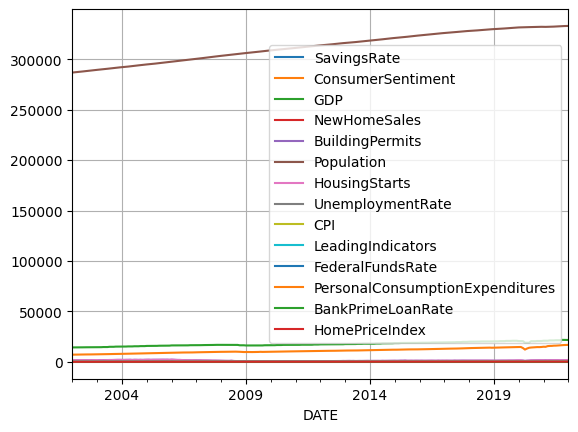

In [56]:
plt.figure(figsize=(20,14))
df.plot()
plt.grid()

In [57]:
df.columns

Index(['SavingsRate', 'ConsumerSentiment', 'GDP', 'NewHomeSales',
       'BuildingPermits', 'Population', 'HousingStarts', 'UnemploymentRate',
       'CPI', 'LeadingIndicators', 'FederalFundsRate',
       'PersonalConsumptionExpenditures', 'BankPrimeLoanRate',
       'HomePriceIndex'],
      dtype='object')

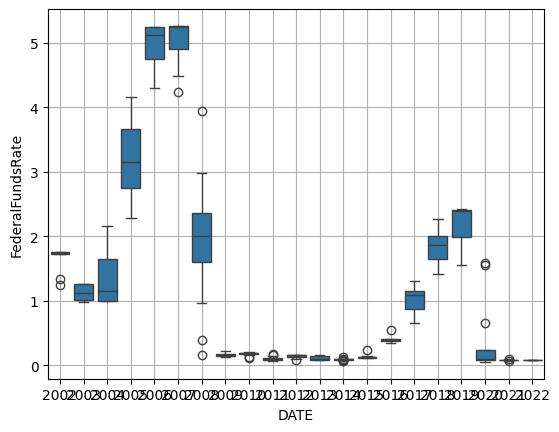

In [60]:
sns.boxplot(x = df.index.year, y = df['FederalFundsRate'])
plt.grid()